# **Netflix User Analysis**

###Importing Libraries

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

##Loading Data

In [428]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Netflix_Userbase.csv')

##Pre-Processing

####Dataset Preview

In [429]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [430]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [432]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [433]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [434]:
# Clean and preprocess the data
# df = df.dropna()  # remove missing values, here no null value
df['Gender'] = df['Gender'].astype('category')  # convert gender to categorical variable
df['Subscription Type'] = df['Subscription Type'].astype('category')  # convert subscription type to categorical variable

# Convert 'Join Date' column to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%Y-%m-%d', errors='coerce')

##Statistics

###Histogram to visualize the age distribution

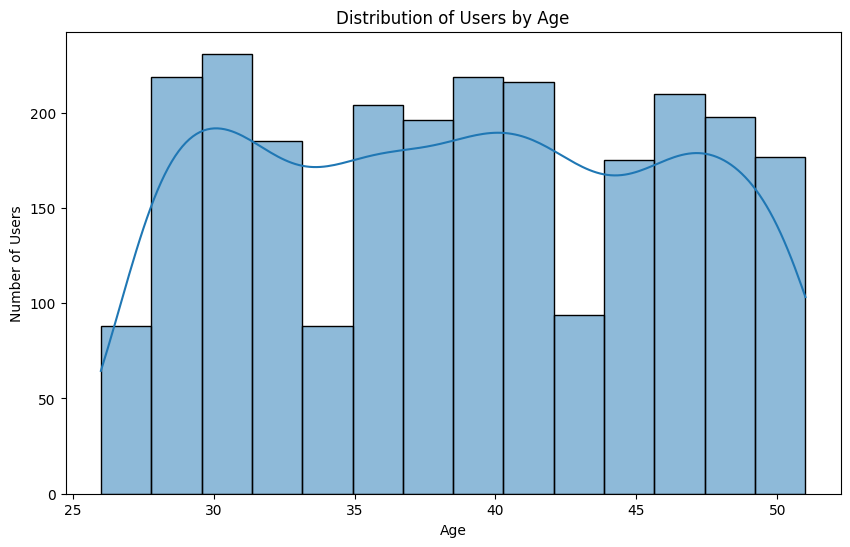

Count of Users per Age:
Age
26      1
27     87
28    115
29    104
30    116
31    115
32     92
33     93
34     88
35    105
36     99
37    107
38     89
39    116
40    103
41    114
42    102
43     94
44     86
45     89
46     99
47    111
48    101
49     97
50     84
51     93
Name: count, dtype: int64


In [435]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['Age'], kde=True)  # kde adds a smoothed density curve
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

age_counts = df['Age'].value_counts().sort_index()
print("Count of Users per Age:")
print(age_counts)

###Distribution of Gender by Subscription Type

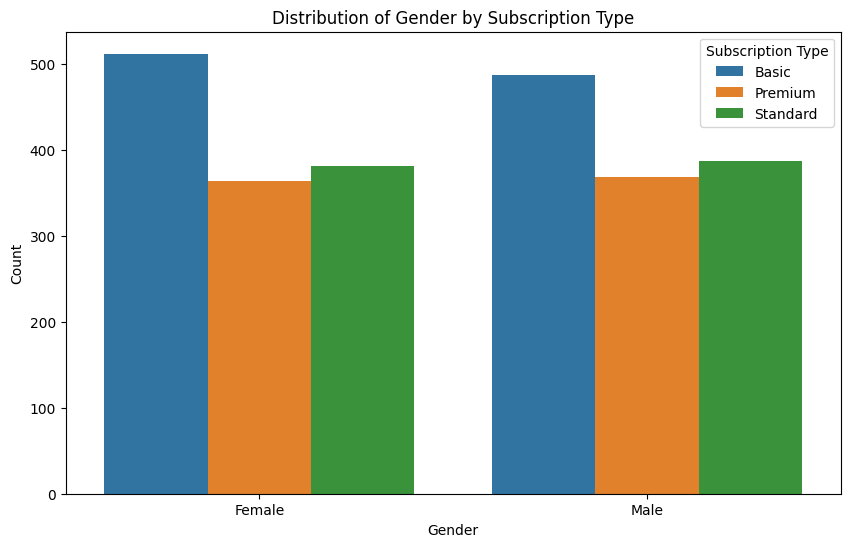

Count of Users by Gender and Subscription Type:
Subscription Type  Basic  Premium  Standard
Gender                                     
Female               512      364       381
Male                 487      369       387


In [436]:
# Analyze the distribution of age and gender across different subscription types and devices
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Subscription Type', data=df)
plt.title('Distribution of Gender by Subscription Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Print count of users by gender and subscription type
gender_subscription_counts = df.groupby(['Gender', 'Subscription Type']).size().unstack(fill_value=0)
print("Count of Users by Gender and Subscription Type:")
print(gender_subscription_counts)

### Distribution of Device by Gender

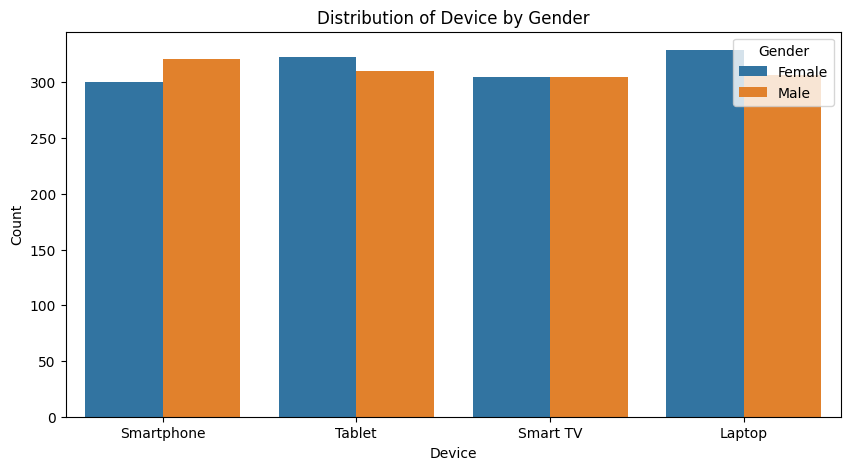

Count of Users by Device and Gender:
Gender      Female  Male
Device                  
Laptop         329   307
Smart TV       305   305
Smartphone     300   321
Tablet         323   310


In [437]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Device', hue='Gender', data=df)
plt.title('Distribution of Device by Gender')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

# Print count of users by device and gender
device_gender_counts = df.groupby(['Device', 'Gender']).size().unstack(fill_value=0)
print("Count of Users by Device and Gender:")
print(device_gender_counts)

### Distribution of User by Subscription Type

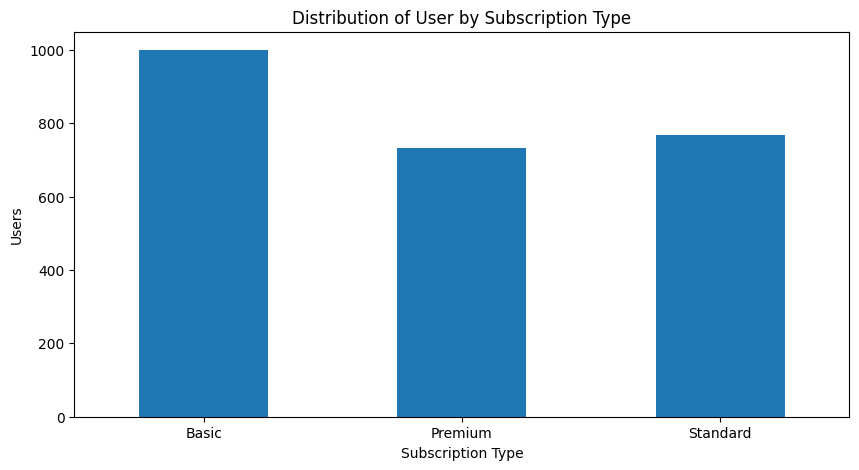

Count of Users by Subscription Type:
Subscription Type
Basic       999
Premium     733
Standard    768
Name: count, dtype: int64


In [438]:
Subscription_plan = df['Subscription Type'].value_counts().sort_index()
plt.figure(figsize=(10,5))
Subscription_plan.plot(kind='bar')
plt.title('Distribution of User by Subscription Type')
plt.ylabel('Users')
plt.xlabel('Subscription Type')
plt.xticks(rotation=0)
plt.show()

# Print count of users by subscription type
subscription_plan_counts = df['Subscription Type'].value_counts().sort_index()
print("Count of Users by Subscription Type:")
print(subscription_plan_counts)

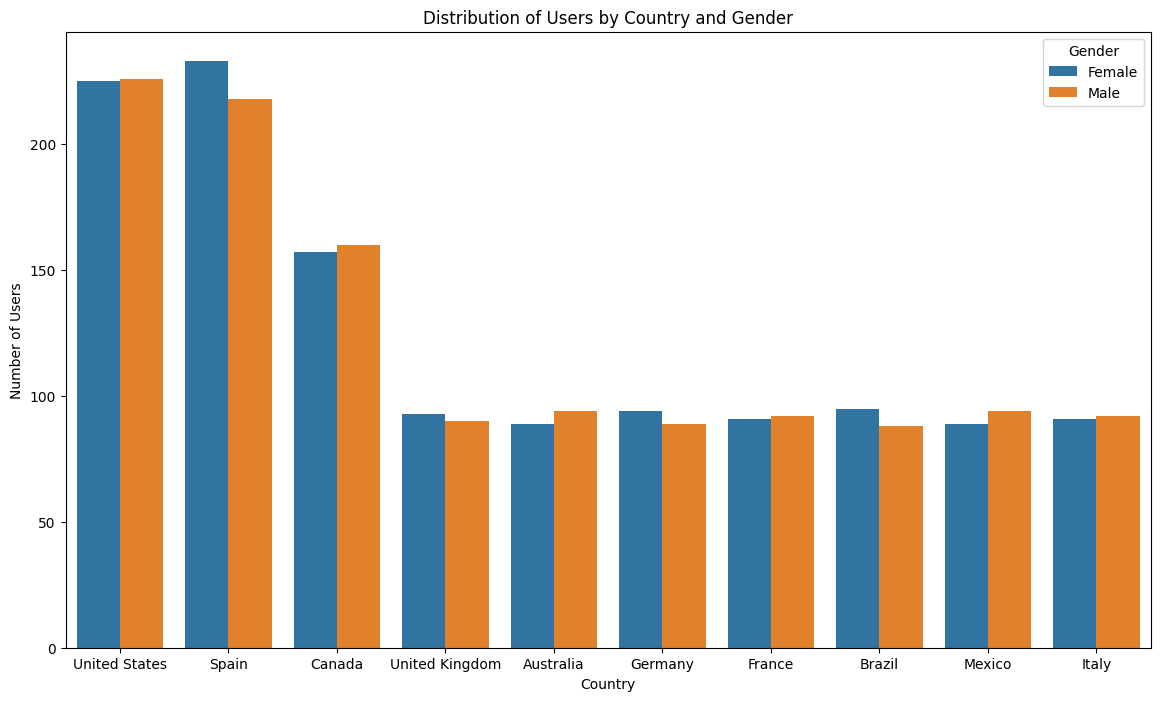

Count of Users per Gender by Country:
Gender          Female  Male
Country                     
Australia           89    94
Brazil              95    88
Canada             157   160
France              91    92
Germany             94    89
Italy               91    92
Mexico              89    94
Spain              233   218
United Kingdom      93    90
United States      225   226


In [439]:
#@title Distribution of gender by country
# Plot the distribution of gender by country
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', hue='Gender', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Users by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.show()
# Count of users per gender by country
gender_country_counts = df.groupby(['Country', 'Gender']).size().unstack(fill_value=0)
print("Count of Users per Gender by Country:")
print(gender_country_counts)


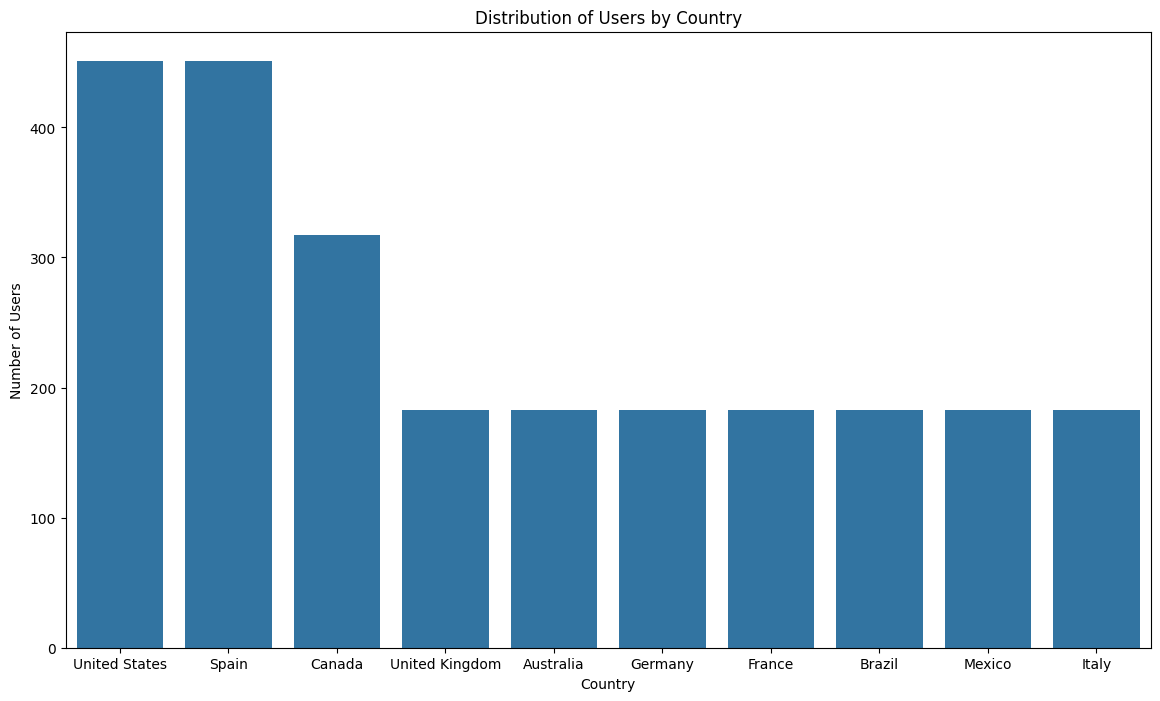


Total User Count per Country:
Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64


In [440]:
#@title  Distribution of users by country
# Plot the distribution of users by country
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

# Total user count per country
country_counts = df['Country'].value_counts()
print("\nTotal User Count per Country:")
print(country_counts)

In [441]:
# Calculate summary statistics for age and gender
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()
gender_counts = df['Gender'].value_counts()

print(f'Mean Age: {age_mean:.2f}')
print(f'Median Age: {age_median:.2f}')
print(f'Standard Deviation of Age: {age_std:.2f}\n')
print(f'Gender Counts: {gender_counts}\n')

# Calculate device counts by gender
device_counts_by_gender = df.groupby(['Gender', 'Device'])['Device'].count()
print(f'Device Counts by Gender:\n{device_counts_by_gender}\n')

# Perform statistical tests to identify any significant differences in age and gender distribution
t_stat, p_val = ttest_ind(df[df['Subscription Type'] == 'Basic']['Age'], df[df['Subscription Type'] == 'Premium']['Age'])
print(f'T-test statistic for Basic vs Premium: {t_stat:.2f}')
print(f'P-value for Basic vs Premium: {p_val:.2f}\n')

# Assuming 'DeviceUsage' is a calculated metric, replace this with your actual calculation
# df['DeviceUsage'] = df['Monthly Revenue'] / df['Age']  # Example calculation


Mean Age: 38.80
Median Age: 39.00
Standard Deviation of Age: 7.17

Gender Counts: Gender
Female    1257
Male      1243
Name: count, dtype: int64

Device Counts by Gender:
Gender  Device    
Female  Laptop        329
        Smart TV      305
        Smartphone    300
        Tablet        323
Male    Laptop        307
        Smart TV      305
        Smartphone    321
        Tablet        310
Name: Device, dtype: int64

T-test statistic for Basic vs Premium: 0.90
P-value for Basic vs Premium: 0.37



##Analysis

Correlation matrix:
                  User ID  Monthly Revenue       Age
User ID          1.000000        -0.004809  0.008065
Monthly Revenue -0.004809         1.000000 -0.021143
Age              0.008065        -0.021143  1.000000



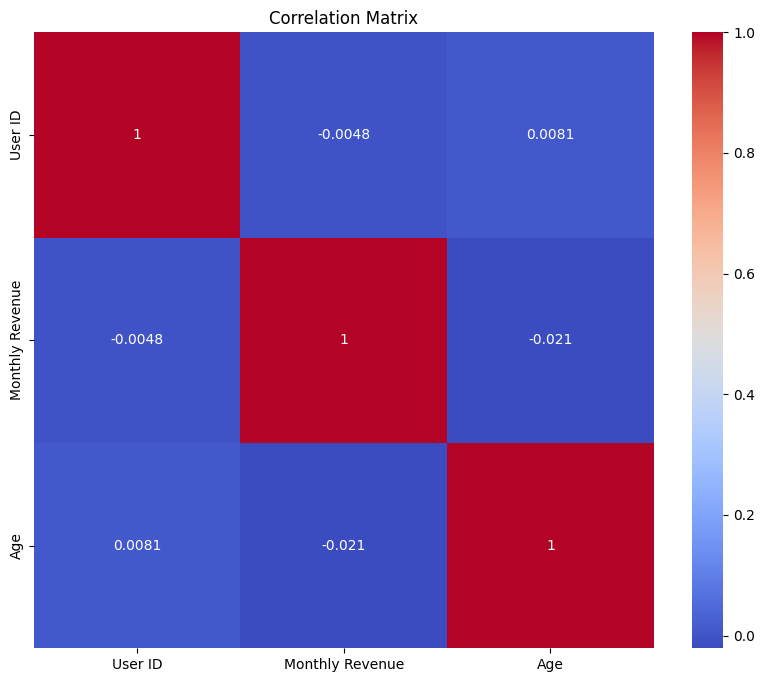

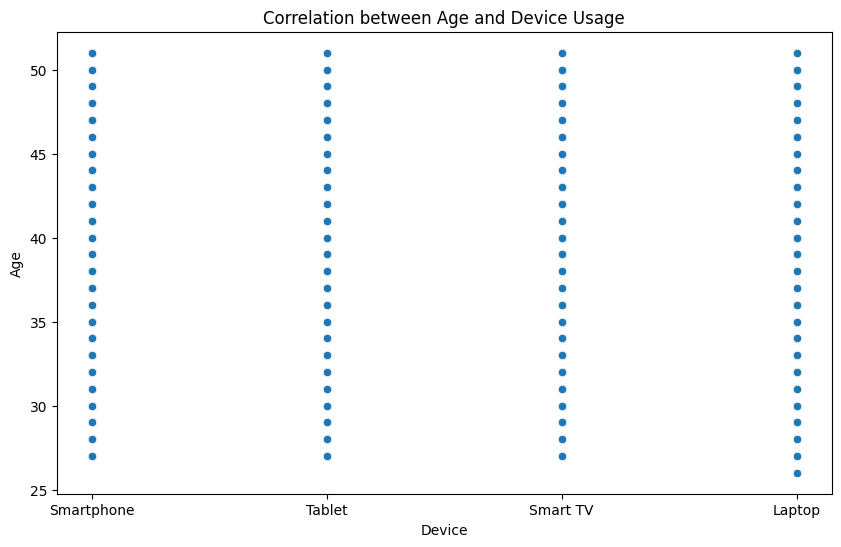

In [442]:
# Analyze the correlation between age and other variables
numerical_df = df.select_dtypes(include=['number'])  # select only numerical columns
corr_matrix = numerical_df.corr()
print(f'Correlation matrix:\n{corr_matrix}\n')
# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Device', y='Age', data=df)
plt.title('Correlation between Age and Device Usage')
plt.xlabel('Device')
plt.ylabel('Age')
plt.show()



---



## > The dataset is inadequate for further any model execution for any prediction or classification

